In [1]:
     
class prepro():
    def __init__(self, data):
        self.data=data
    
    def info(self):
        import pandas as pd 
        from pandas import Series, DataFrame
        
        print(self.data.head())
        
        print("DATA INFORMATION:")
        print(self.data.info())
        
        print("DATA DESCRIPTION:")
        print(self.data.describe())
        
        print("NULL VALUES:")
        print(self.data.isnull().sum(axis = 0))
    
class inf_stats(): 
    def __init__(self, data):
        self.data=data
        
    def corr(self):
        import seaborn as sns
        import matplotlib.pyplot as plt       
        fig,ax = plt.subplots(figsize=(7, 7))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        plt.show()

    def norm_test(self, column):
        import pylab
        import scipy.stats as stats
        from scipy.stats import shapiro
        
        print("H0: Data normally distributed\n")      
        
        
        stat, p= shapiro(self.data[column])
        print("Statistic= {} , p-val={}".format( stat, p))
        
        if p>0.05:
            print("H0-> Fail to Reject. Data is normally distributed.")
        else:
            print("H0-> Reject. Data is not normally distributed.")
        
        #Probability plot çizdirerek, görselleştirme de yapıyoruz.
        stats.probplot(self.data[column],dist='norm',plot=pylab)
        pylab.show()
        
    def t_test(self, popmean, column):
        import scipy.stats as stats 
        import statsmodels.stats.api as sms
        
        #one- sample t-test 
        self.column=column
        self.popmean=popmean
        print("Hypothesis:\nH0:μ0={}\n".format(self.popmean))
        
        #calculation of p-value and statistic
        stat, pval=stats.ttest_1samp(self.data[self.column],popmean=self.popmean)
        print('RESULT=\nStatistics=%.3f,p-value=%.3f' % (stat,pval))
        
        #confidence interval
        cf=sms.DescrStatsW(self.data[self.column]).tconfint_mean()
        print("Confidence Interval={}\n".format(cf))
        
        if pval<0.05:
            print("Reject H0 --> μ0≠{}". format(self.popmean))
        else:
            print("Fail to reject H0 --> μ0={}". format(self.popmean))
     
    def num_cat(self,cl1,cl2):
        import pandas as pd 
        import numpy as np 
        from scipy.stats import shapiro 
        A=Series(self.data[cl1].iloc[:][data[cl2]==1])
        B=Series(self.data[cl1].iloc[:][data[cl2]==0])
        
        #A_B=pd.concat([A,B], axis=1)
        #A_B.columns=["A","B"]

        print("    ******KS TEST******   ")
        print("HİPOTEZ:")
        print("H0:{}-{}=1 and {}-{} =0 have same distribution\n".format(cl1,cl2,cl1,cl2))
        import scipy
        
        stat, p=scipy.stats.ks_2samp(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different distribution\n")
        else:
            print("H0--> Fail to Reject.\n")
        
        import scipy.stats as stats
        
        print("VARIANCE:")
        print("HİPOTEZ:")
        print("H0:'{}' and '{}' have same variance\n".format(cl1,cl2))
        
        stat, p=stats.levene(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different variance\n")
        else:
            print("H0--> Fail to Reject.")
            
        if p<0.05:
            equal_var=False
        else:
            equal_var=True
        print("MEAN:")
        stat, p=stats.ttest_ind(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different mean\n")
        else:
            print("H0--> Fail to Reject.")
            
    def chi2(self,cl1,cl2):
        import scipy.stats 
        cross=pd.crosstab(index=self.data[cl2], columns=self.data[cl1])
        from numbers import Number
        chi2,p,dof,expected= scipy.stats.chi2_contingency(cross)#survived ve sex arasında bağlantı var mı?
        result=[["chi",chi2],["p",p]]
        print(result)

    
    
    def box_2samp(self,cl1,cl2):
        import matplotlib.pyplot as plt
        import seaborn as sns
        figg=plt.figure(figsize=(5,5))
        sns.boxplot(x=data[cl1],y=data[cl2])

class visualize():
    def __init__(self, data):
        self.data=data
    
    def hist_all(self):
        import matplotlib.pyplot as plt
        #self.column=column
        
        for col in self.data.columns:
            fig=self.data[col].plot.hist()
            fig.set_title(col)
            plt.show()

        
        

class model():
    pass
class supervised(model): #inheritance
    def regression():
        pass
    def classification():
        pass
class unsupervised(model):
    def clustering():
        pass

In [4]:
import pandas as pd
from pandas import Series, DataFrame
dat=pd.read_csv("hmelq.csv")
data=dat.copy()
data=data.dropna()
data.head()


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


# Data Information

In [77]:
df=prepro(data)
df.info()

     bad   loan   mortdue     value   reason  job   yoj  derog  delinq  \
153    0  18200   94727.0  136877.0  DebtCon  Mgr  15.0    0.0     0.0   
154    0  21700   79240.0   96784.0  DebtCon  Mgr   5.0    0.0     0.0   
155    0  34100  241931.0   36486.0  DebtCon  Mgr   1.0    0.0     2.0   
156    0   8400   62989.0   76718.0  HomeImp  Mgr   3.0    0.0     2.0   
157    0  17400   25859.0   43684.0  DebtCon  Mgr  16.0    1.0     0.0   

      clage  ninq  clno  debtinc  
153  168.96   2.0  26.0   36.056  
154   64.51   6.0  24.0   38.079  
155  196.01   3.0  50.0   42.459  
156  131.47   0.0  22.0   29.200  
157   95.36   1.0  17.0   27.108  
DATA INFORMATION:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null 

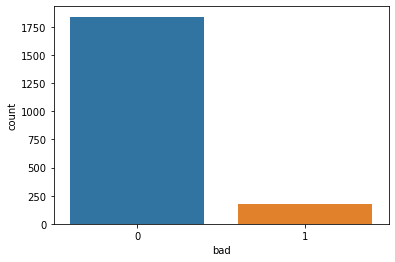

In [47]:
import seaborn as sns
sns.countplot("bad", data=data)

## Categorical Variables

In [66]:
col=data.columns
num_cols=data._get_numeric_data().columns
CAT=set(col)-set(num_cols)
CAT

{'job', 'reason'}

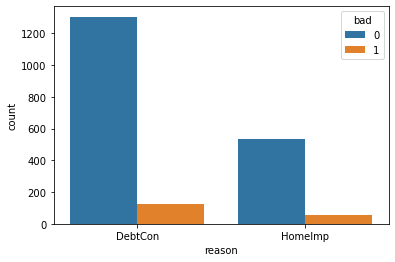

In [44]:
sns.countplot("reason", hue="bad", data=data)

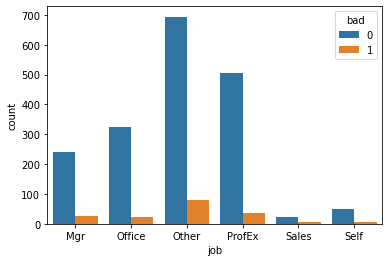

In [7]:
sns.countplot("job", hue="bad", data=data)

In [37]:
pd.crosstab(data["bad"], data["job"]).style.background_gradient(cmap="Oranges")

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,242,326,694,504,23,51
1,27,22,80,35,7,7


In [32]:
pd.crosstab(data["bad"], data["reason"]).style.background_gradient(cmap="Oranges")

reason,DebtCon,HomeImp
bad,,
0,1304,536
1,124,54


In [79]:
df1=inf_stats(data)
df1.chi2("job","bad")

[['chi', 17.653162201450712], ['p', 0.0034140218372415696]]


In [80]:
df1.chi2("reason","bad")

[['chi', 0.06334081421292037], ['p', 0.8012915011681949]]


"reason" has no effect on "bad"

## Numerical Variables

In [81]:
num_data=data.drop(["bad","job","reason"],axis=1)

In [86]:
df_v=visualize(num_data)

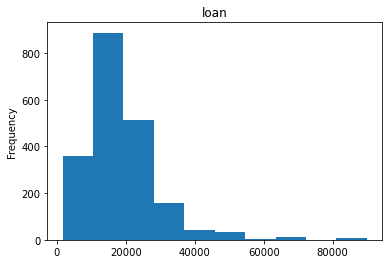

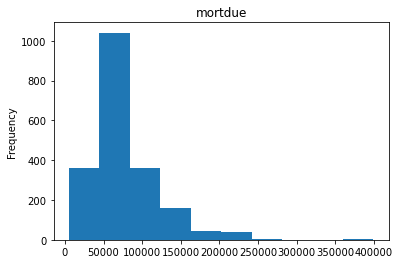

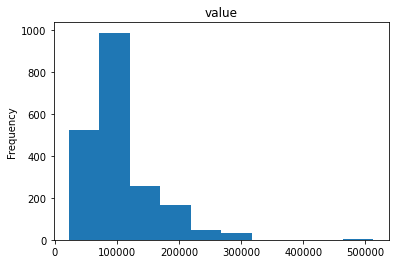

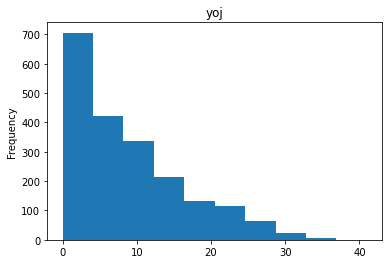

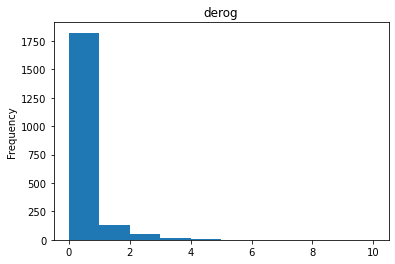

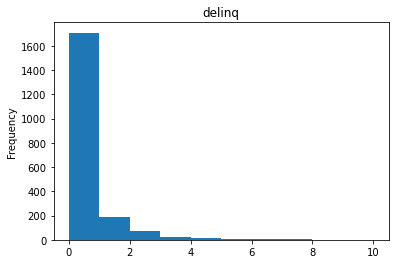

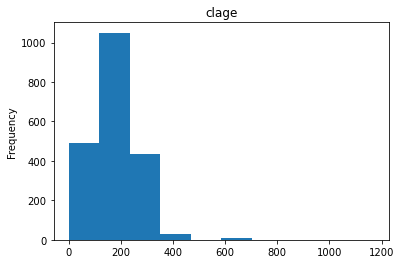

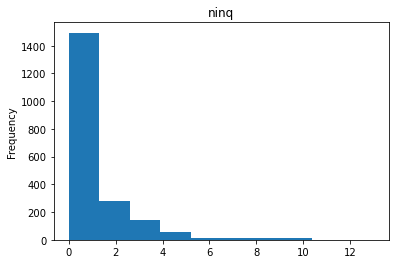

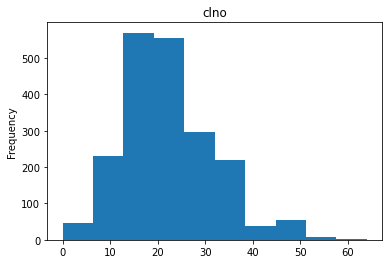

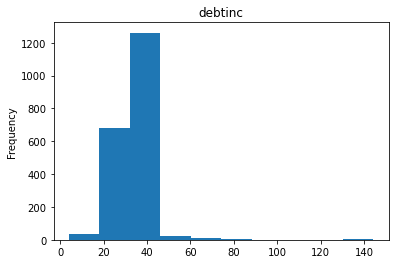

In [87]:
df_v.hist_all()

## Numerik Verilerin Normallik Testi

LOAN
H0: Data normally distributed

Statistic= 0.8360166549682617 , p-val=1.9721874586907475e-41
H0-> Reject. Data is not normally distributed.


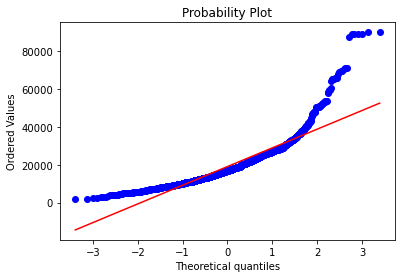

None
MORTDUE
H0: Data normally distributed

Statistic= 0.8624268174171448 , p-val=7.460412130575895e-39
H0-> Reject. Data is not normally distributed.


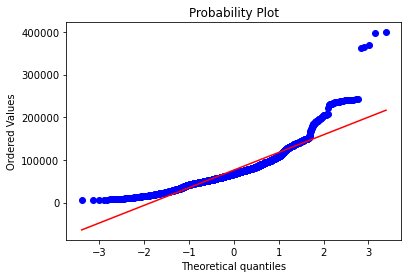

None
VALUE
H0: Data normally distributed

Statistic= 0.8436811566352844 , p-val=1.0142738414629458e-40
H0-> Reject. Data is not normally distributed.


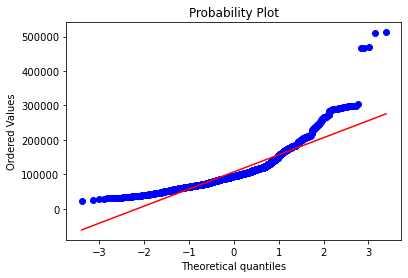

None
YOJ
H0: Data normally distributed

Statistic= 0.9115960597991943 , p-val=9.607595978546815e-33
H0-> Reject. Data is not normally distributed.


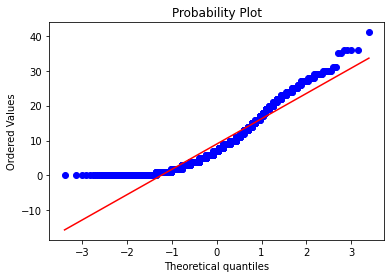

None
DEROG
H0: Data normally distributed

Statistic= 0.2769438624382019 , p-val=0.0
H0-> Reject. Data is not normally distributed.


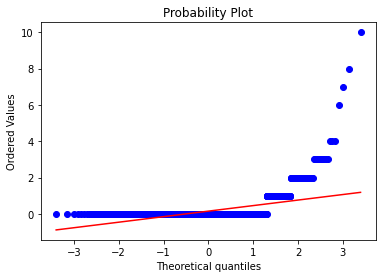

None
DELINQ
H0: Data normally distributed

Statistic= 0.3798753023147583 , p-val=0.0
H0-> Reject. Data is not normally distributed.


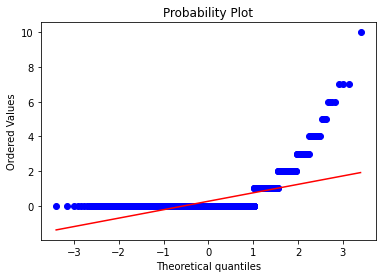

None
CLAGE
H0: Data normally distributed

Statistic= 0.9051468372344971 , p-val=1.112704769060138e-33
H0-> Reject. Data is not normally distributed.


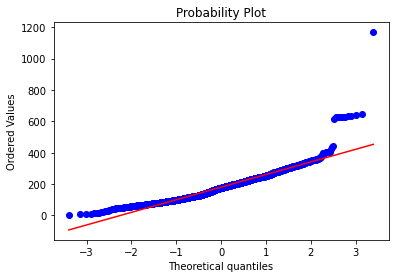

None
NINQ
H0: Data normally distributed

Statistic= 0.6690858602523804 , p-val=0.0
H0-> Reject. Data is not normally distributed.


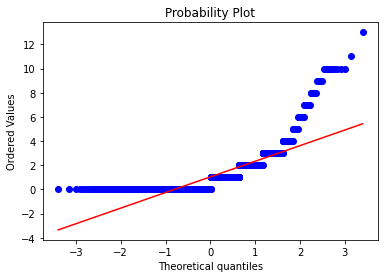

None
CLNO
H0: Data normally distributed

Statistic= 0.964141309261322 , p-val=5.696766726335972e-22
H0-> Reject. Data is not normally distributed.


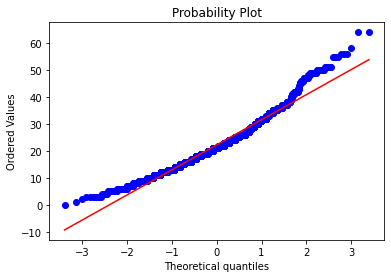

None
DEBTINC
H0: Data normally distributed

Statistic= 0.8244601488113403 , p-val=1.8707334498736308e-42
H0-> Reject. Data is not normally distributed.


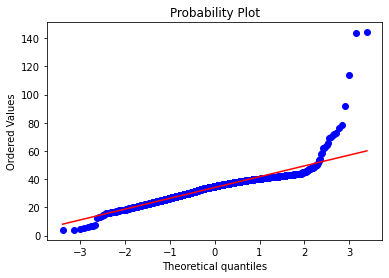

None


In [85]:
for col in num_data.columns:
    print(col.upper())
    print(df1.norm_test(col))

### Korelasyon 

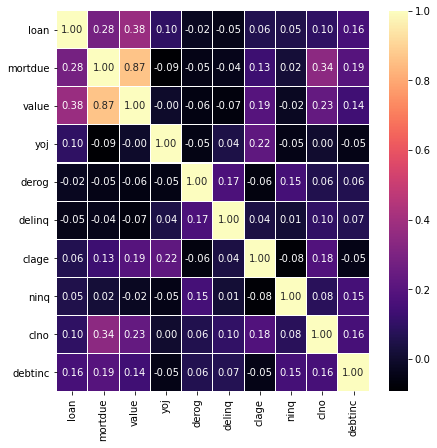

In [89]:
data_cor=inf_stats(num_data)
data_cor.corr()

In [ ]:
Korelasyon testi sonucunda value-mortdue ve value-loan arasında pozitif ilişki çıkmıştır.

### 2 Örneklem t-testi

In [99]:
for col in num_data.columns:
    df_test.num_cat(col,"bad")

    ******KS TEST******   
HİPOTEZ:
H0:loan-bad=1 and loan-bad =0 have same distribution

Statistic= 0.14465681485100146, p-val=0.001978887444979316
H0--> Reject. They have different distribution

VARIANCE:
HİPOTEZ:
H0:'loan' and 'bad' have same variance

Statistic= 2.3947745891982195, p-val=0.12189825252399986
H0--> Fail to Reject.
MEAN:
Statistic= -1.176054303533842, p-val=0.23971203285250864
H0--> Fail to Reject.
    ******KS TEST******   
HİPOTEZ:
H0:mortdue-bad=1 and mortdue-bad =0 have same distribution

Statistic= 0.13398265754763067, p-val=0.005274509868711474
H0--> Reject. They have different distribution

VARIANCE:
HİPOTEZ:
H0:'mortdue' and 'bad' have same variance

Statistic= 2.3073764505136856, p-val=0.12891801775903636
H0--> Fail to Reject.
MEAN:
Statistic= -1.127470718824357, p-val=0.259677683857574
H0--> Fail to Reject.
    ******KS TEST******   
HİPOTEZ:
H0:value-bad=1 and value-bad =0 have same distribution

Statistic= 0.1447545188080117, p-val=0.0019656922486886996
H0

In [95]:
df_test=inf_stats(data)
df_test.num_cat("value","bad")

    ******KS TEST******   
HİPOTEZ:
H0:value-bad=1 and value-bad =0 have same distribution

Statistic= 0.1447545188080117, p-val=0.0019656922486886996
H0--> Reject. They have different distribution

VARIANCE:
HİPOTEZ:
H0:'value' and 'bad' have same variance

Statistic= 3.9912413972700382, p-val=0.0458714974437462
H0--> Reject. They have different variance

MEAN:
Statistic= -1.406867566020743, p-val=0.15962080002954823
H0--> Fail to Reject.


In [91]:
df_test.num_cat("mortdue","bad")

    ******KS TEST******   
HİPOTEZ:
H0:mortdue-bad=1 and mortdue-bad =0 have same distribution

Statistic= 0.13398265754763067, p-val=0.005274509868711474
H0--> Reject. They have different distribution

VARIANCE:
HİPOTEZ:
H0:'mortdue' and 'bad' have same variance

Statistic= 2.3073764505136856, p-val=0.12891801775903636
H0--> Fail to Reject.
MEAN:
Statistic= -1.127470718824357, p-val=0.259677683857574
H0--> Fail to Reject.


In [92]:
df_test.num_cat("loan","bad")

    ******KS TEST******   
HİPOTEZ:
H0:loan-bad=1 and loan-bad =0 have same distribution

Statistic= 0.14465681485100146, p-val=0.001978887444979316
H0--> Reject. They have different distribution

VARIANCE:
HİPOTEZ:
H0:'loan' and 'bad' have same variance

Statistic= 2.3947745891982195, p-val=0.12189825252399986
H0--> Fail to Reject.
MEAN:
Statistic= -1.176054303533842, p-val=0.23971203285250864
H0--> Fail to Reject.


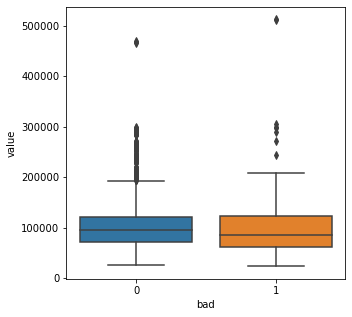

In [96]:
df_test.box_2samp("bad","value")

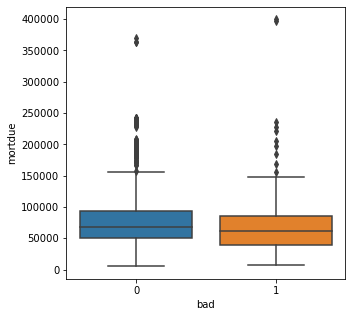

In [98]:
df_test.box_2samp("bad","mortdue")

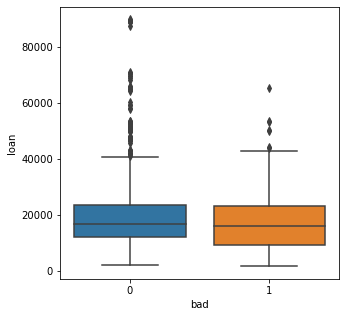

In [97]:
df_test.box_2samp("bad","loan")

# MODEL

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [19]:
dat=pd.read_csv("hmelq.csv")
data_model=dat.copy()
data_model=data.dropna()

In [20]:
dms=pd.get_dummies(data_model[["job","reason"]])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


In [21]:
y=data_model["bad"]
X_=data_model.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,reason_DebtCon
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,1
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,1
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,1
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,1


In [9]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [110]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [116]:
y_pred=loj_model.predict(X_test)

In [117]:
accuracy_score(y_test,y_pred)

0.9133663366336634

In [119]:
accuracy_score(y_train,loj_model.predict(X_train))

0.9114002478314746

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       369
           1       0.00      0.00      0.00        35

    accuracy                           0.91       404
   macro avg       0.46      0.50      0.48       404
weighted avg       0.83      0.91      0.87       404



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
confusion_matrix(y_test,y_pred)

array([[369,   0],
       [ 35,   0]], dtype=int64)

In [123]:
#statsmodels

In [10]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
loj=sm.Logit(y_train,X_train)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.242501
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1598
Method:                           MLE   Df Model:                           15
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.1897
Time:                        15:56:30   Log-Likelihood:                -391.40
converged:                       True   LL-Null:                       -483.05
Covariance Type:            nonrobust   LLR p-value:                 5.126e-31
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.976e-05   1.19e-05     -2.504      0.012   -5.31e-05   -6.46e-06
mortdue        -1.942e-06   5.19e-06     -0.374      0.708   -1.21e-05    8.24e-06
value           9.806e-07   4.52e-06      0.217      0.828   -7.87e-06    9.84e-06
yoj               -0.0149      0.015     -1.014      0.310      -0.044       0.014
derog              0.5451      0.149      3.646      0.000       0.252       0.838
delinq             0.7886      0.102      7.719      0.000       0.588       0.989
clage             -0.0064      0.002     -4.237      0.000      -0.009      -0.003
ninq               0.0866      0.051      1.709      0.087      -0.013       0.186
clno              -0.0357      0.012     -3.053      0.002      -0.059      -0.013
debtinc            0.0631      0.011      5.667      0.000       0.041       0.085
job_Mgr           -2.5085      0.396     -6.341      0.000      -3.284      -1.733
job_Office        -3.0032      0.415     -7.240      0.000      -3.816      -2.190
job_Other         -2.7573      0.344     -8.025      0.000      -3.431      -2.084
job_ProfEx        -2.5386      0.365     -6.950      0.000      -3.254      -1.823
job_Sales         -2.0808      0.771     -2.699      0.007      -3.592      -0.570
reason_DebtCon    -0.0382      0.214     -0.179      0.858      -0.457       0.380
==================================================================================
"""

In [11]:
X_train=X_train.drop(["value","reason_DebtCon"],axis=1)

In [12]:
loj=sm.Logit(y_train,X_train)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.242527
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1600
Method:                           MLE   Df Model:                           13
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.1896
Time:                        15:57:02   Log-Likelihood:                -391.44
converged:                       True   LL-Null:                       -483.05
Covariance Type:            nonrobust   LLR p-value:                 3.739e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.913e-05   1.08e-05     -2.703      0.007   -5.02e-05   -8.01e-06
mortdue     -9.99e-07   2.77e-06     -0.360      0.718   -6.43e-06    4.43e-06
yoj           -0.0145      0.015     -0.989      0.323      -0.043       0.014
derog          0.5448      0.149      3.655      0.000       0.253       0.837
delinq         0.7888      0.102      7.754      0.000       0.589       0.988
clage         -0.0064      0.001     -4.287      0.000      -0.009      -0.003
ninq           0.0843      0.050      1.691      0.091      -0.013       0.182
clno          -0.0362      0.012     -3.130      0.002      -0.059      -0.014
debtinc        0.0632      0.011      5.685      0.000       0.041       0.085
job_Mgr       -2.5243      0.384     -6.571      0.000      -3.277      -1.771
job_Office    -3.0163      0.401     -7.521      0.000      -3.802      -2.230
job_Other     -2.7706      0.331     -8.376      0.000      -3.419      -2.122
job_ProfEx    -2.5418      0.355     -7.168      0.000      -3.237      -1.847
job_Sales     -2.1006      0.768     -2.736      0.006      -3.605      -0.596
==============================================================================
"""

In [15]:
X_train=X_train.drop(["ninq","yoj","mortdue"],axis=1)

In [16]:
loj=sm.Logit(y_train,X_train)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.243753
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1603
Method:                           MLE   Df Model:                           10
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.1856
Time:                        15:58:54   Log-Likelihood:                -393.42
converged:                       True   LL-Null:                       -483.05
Covariance Type:            nonrobust   LLR p-value:                 3.335e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan        -2.98e-05   1.04e-05     -2.872      0.004   -5.01e-05   -9.46e-06
derog          0.5905      0.145      4.065      0.000       0.306       0.875
delinq         0.7730      0.099      7.788      0.000       0.578       0.967
clage         -0.0071      0.001     -4.901      0.000      -0.010      -0.004
clno          -0.0360      0.011     -3.235      0.001      -0.058      -0.014
debtinc        0.0639      0.011      5.973      0.000       0.043       0.085
job_Mgr       -2.5034      0.375     -6.669      0.000      -3.239      -1.768
job_Office    -3.0132      0.394     -7.654      0.000      -3.785      -2.242
job_Other     -2.7523      0.317     -8.670      0.000      -3.375      -2.130
job_ProfEx    -2.5810      0.350     -7.367      0.000      -3.268      -1.894
job_Sales     -2.0790      0.756     -2.751      0.006      -3.560      -0.598
==============================================================================
"""

In [26]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=X.drop(["ninq","yoj","mortdue","value","reason_DebtCon"],axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,4.183112,loan
1,1.124569,derog
2,1.165279,delinq
3,5.550302,clage
4,6.943635,clno
5,14.543216,debtinc
6,2.700248,job_Mgr
7,3.117296,job_Office
8,5.567195,job_Other
9,4.357132,job_ProfEx


In [30]:
X=X.drop(["debtinc"],axis=1)

In [31]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [32]:
y_pred=loj_model.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.9183168316831684

In [34]:
accuracy_score(y_train,loj_model.predict(X_train))

0.919454770755886

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       369
           1       0.67      0.11      0.20        35

    accuracy                           0.92       404
   macro avg       0.79      0.55      0.58       404
weighted avg       0.90      0.92      0.89       404



In [37]:
cross_val_score(loj_model,X_train,y_train, cv=10).mean()

0.9206847634383866